In [ ]:
#Author: Cem Tarhan
#Project: Image Segmentation

import cv2 as cv
import cv2
import numpy as np
from matplotlib import pyplot as plt
import json
from google.colab import drive
from google.colab.patches import cv2_imshow

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
img = cv2.imread('/content/gdrive/My Drive/3a.png' ,0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

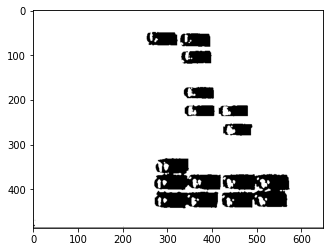

In [ ]:
#Read the image for dilation
img2= th3
#Acquire size of the image
p,q= img2.shape
#Show the image
plt.imshow(img2, cmap="gray")
#Define new image to store the pixels of dilated image
imgDilate= np.zeros((p,q), dtype=np.uint8)
#Define the structuring element 
SED= np.array([[0,1,0], [1,1,1],[0,1,0]])
constant1=1
#Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp= img2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product= temp*SED
    imgDilate[i,j]= np.max(product)
plt.imshow(imgDilate,cmap="gray")

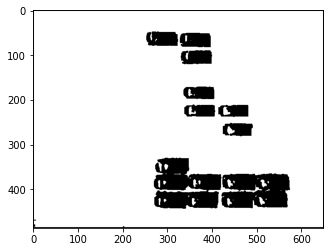

In [ ]:
#Read the image for erosion
img1= imgDilate
#Acquire size of the image
m,n= img1.shape 
#Show the image
plt.imshow(img1, cmap="gray")
# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k= 3
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2
#Define new image
imgErode= np.zeros((m,n), dtype=np.uint8)
#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= img1[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*SE
    imgErode[i,j]= np.min(product)
plt.imshow(imgErode,cmap="gray")

In [ ]:
img = imgErode
img_not = cv2.bitwise_not(img)

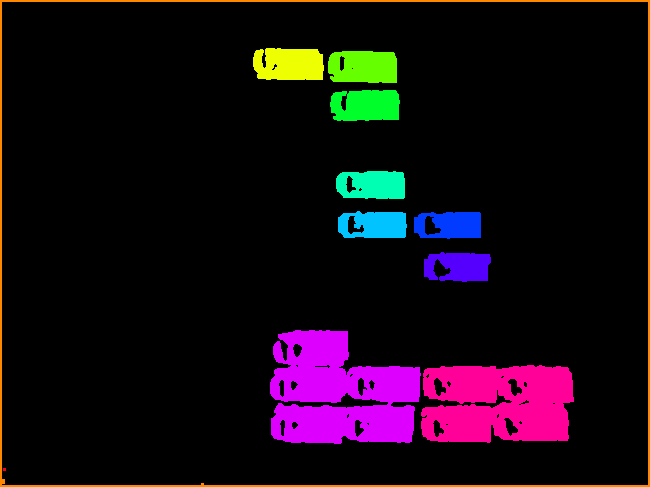

In [ ]:
img = img_not
num_labels, labels_im = cv2.connectedComponents(img)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2_imshow(labeled_img)
    cv2.waitKey() & 0xFF

imshow_components(labels_im)